## 1.1 Training and running a linear model using Scikit-Learn

Fitting a linear model to attempt to discover a correlation between GDP per capita and life satisfaction index.

In [58]:
#Importing packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
%matplotlib inline

In [36]:
#Loading the BLI data and pivoting for the numerical values of each indicator for each Country. 
oecd_bli = pd.read_csv("./Data/BLI.csv",thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6,1.1,77,13.39,72,62.6,0.8,33138,48836,20,...,51148,95,2.3,85,2.7,512,14.35,93,94,19.2
Austria,15,1.0,84,7.32,71,81.2,0.4,31667,55623,21,...,45988,93,1.6,69,1.3,500,14.55,75,93,17.1


In [38]:
#Loading the GDP per capita data and renaming columns for clarity.
gdp_per_capita = pd.read_csv("./Data/gdp_per_capita.csv", thousands=',' , delimiter='\t',
                            encoding='latin1', na_values="n/a", index_col="Country")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010


In [40]:
# Merging both dataframes and sorting by the GDP per capita
country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
country_stats.sort_values(by="GDP per capita", inplace= True)
country_stats.head(2)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,14,20.5,65,18.07,43,39.8,9.6,8712,16937,18,...,14.73,73,69,15.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5694.572,2014
Brazil,17,6.7,46,9.45,67,39.5,26.7,11487,7566,21,...,14.27,79,73,15.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014


In [55]:
#Extracting the desired features into X and Y arrays
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

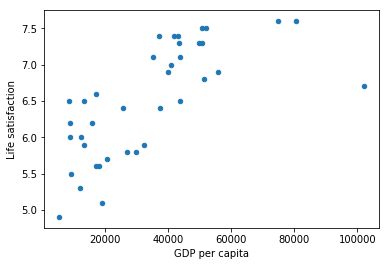

In [53]:
#Visualizing the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction');
plt.show()

In [62]:
#Selecting a linear model
lin1 = linear_model.LinearRegression()
#Training the model
lin1.fit(X,y)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(5.6656730772878445, 2.4666286830984237e-05)

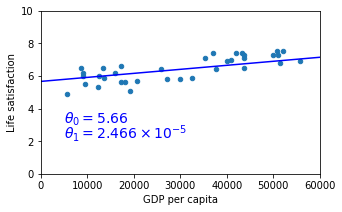

In [75]:
#Plotting the the model obtained
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 5.66$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 2.466 \times 10^{-5}$", fontsize=14, color="b")

plt.show()

In [72]:
#Making life satisfaction prediction for Cyprus from its GDP/capita
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
cyprus_predicted_life_satisfaction =lin1.predict(cyprus_gdp_per_capita)[0][0]
print(cyprus_gdp_per_capita , cyprus_predicted_life_satisfaction)

22587.49 6.22282258442


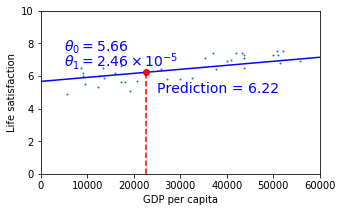

In [76]:
#Plotting prediction location on plot
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 5.66$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 2.46 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 6.22", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
plt.show()

## Sources:

1. Handson-ml-master GitHub: https://github.com/ageron/handson-ml
2. OECD Dataset: http://stats.oecd.org/index.aspx?DataSetCode=BLI#